In [ ]:
import json
with open("ideals.json", "r") as f:
    data = json.load(f)



In [ ]:
print("Number of parties: ", len(data))
print("Number of policies: ", sum([len(i) for i in data.values()]))
print("Average number of policies per party: ", sum([len(i) for i in data.values()]) / len(data))

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
embeddings = []
labels = []

targets = ["Australian Labor Party", "Liberal Party of Australia", "National Party", "The Australian Greens", "Katter's Australian Party", "Centre Alliance"]

for party in targets:
    for policy in data[party]:
        embedding = model.encode(policy)
        embeddings.append(embedding)
        labels.append(party)
        

In [ ]:
from sklearn.decomposition import PCA
embeddings  = np.array(embeddings)
embeddings = PCA(n_components=2).fit_transform(embeddings)

In [ ]:
cluster_embeddings = {}
for idx, party in enumerate(labels):
	cluster_embeddings.setdefault(party, [])
	cluster_embeddings[party].append(embeddings[idx])

clusters = {}
for party in cluster_embeddings:
	party_embedding = np.array(cluster_embeddings[party])
	size = np.mean(np.std(party_embedding, axis=0))
	if size > 0.01 or len(cluster_embeddings[party]) > 5:
		clusters[party] = {
			"mean": np.mean(party_embedding, axis=0),
			"std": size
		}


In [ ]:
import matplotlib.pyplot as plt

plt.cla()
plt.clf()

plt.figure(figsize=(20, 20))

unique_labels = list(set(labels))
label_to_color = {label: i for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]
cmap = plt.get_cmap('tab10')
c = [cmap(c / len(unique_labels)) for c in colors]

plt.scatter([i[0] for i in embeddings], [i[1] for i in embeddings], c=c, alpha=0.1)

for party in clusters:
	plt.scatter(clusters[party]["mean"][0], clusters[party]["mean"][1], s=clusters[party]["std"] * 100000, alpha=0.2, c=cmap(label_to_color[party] / len(unique_labels)))#, label=party)
	plt.annotate(party, (clusters[party]["mean"][0], clusters[party]["mean"][1]), ha='center')

plt.xlim(-0.3, 0.2)
plt.ylim(-0.2, 0.25)

for label in unique_labels:
    i = labels.index(label)  # get first occurrence for legend
    plt.scatter([], [], color=cmap(label_to_color[label] / len(unique_labels)), label=label)


plt.legend(title='Label')
plt.show()

["I'm 0 percent confident that we should have nuclear power in australia", "I'm 1 percent confident that we should have nuclear power in australia", "I'm 2 percent confident that we should have nuclear power in australia", "I'm 3 percent confident that we should have nuclear power in australia", "I'm 4 percent confident that we should have nuclear power in australia", "I'm 5 percent confident that we should have nuclear power in australia", "I'm 6 percent confident that we should have nuclear power in australia", "I'm 7 percent confident that we should have nuclear power in australia", "I'm 8 percent confident that we should have nuclear power in australia", "I'm 9 percent confident that we should have nuclear power in australia", "I'm 10 percent confident that we should have nuclear power in australia", "I'm 11 percent confident that we should have nuclear power in australia", "I'm 12 percent confident that we should have nuclear power in australia", "I'm 13 percent confident that we 

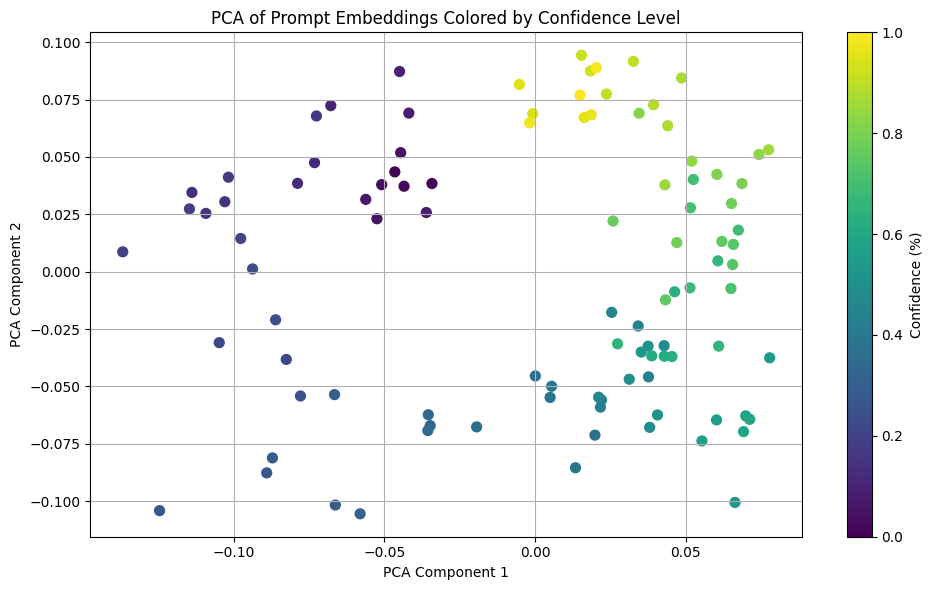

In [14]:
base_prompt = "I'm {p} percent confident that we should have nuclear power in australia"
prompts = []
num = 100
for i in range(num):
    prompts.append(base_prompt.format(p=i))

print(prompts)

embeddings = model.encode(prompts)
embeddings  = np.array(embeddings)
pca_embeddings = PCA(n_components=2).fit_transform(embeddings)

# Generate color map
colors = plt.cm.viridis(np.linspace(0, 1, num))

# Plot the PCA-reduced embeddings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=colors, s=50)
plt.colorbar(scatter, label="Confidence (%)")
plt.title("PCA of Prompt Embeddings Colored by Confidence Level")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
